#GRIP : The Sparks Foundation
GRIPMAY23


Data Science and Business Analytics Internship 


#TASK 3 :

Exploratory Data Analysis - Retail

Task -

Perform 'Exploratory Data Analysis' on data set ' SampleSuperstore'
As a business manager, try to find out the weak areas where you can work to make more profit.
what all business problems you can derive by exploring the data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()
# only numeric columns are considered

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
# check for unique values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#Unique Values of each Column -
for col in df[:]:
    print(col,":",df[col].unique())
    print("-"*100)

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
----------------------------------------------------------------------------------------------------
Segment : ['Consumer' 'Corporate' 'Home Office']
----------------------------------------------------------------------------------------------------
Country : ['United States']
----------------------------------------------------------------------------------------------------
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasaden

In [11]:
df.isnull().sum()
#This will output the number of missing values in each column of the DataFrame

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

DATA CLEANING

In [12]:
df.duplicated().sum()

17

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()


0

In [15]:
# The data is only for 1 country, We can remove the country column
df= df.drop('Country', axis=1)

In [16]:
# Since postal code indirectly speaks about State, City in which the data is, we can drop it too
df= df.drop(columns="Postal Code")

In [17]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [18]:
#Checking for missing data
df.isnull().values.any()

False

In [19]:
#Exploring dataset types
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

CORELATION

In [20]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<ipython-input-21-5bba386ac2e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False, annot_kws={'size':14})


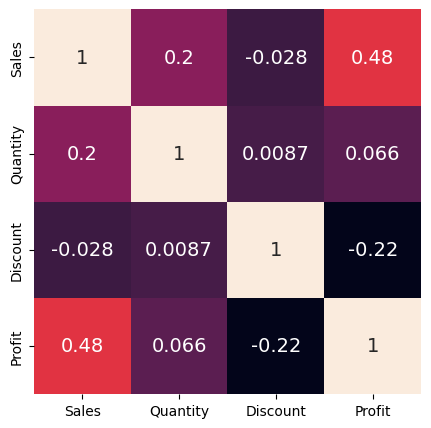

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

In [22]:
#There exists a correlation between sales and profit

DATA VISUALIZATION

In [23]:
# sales vs profit

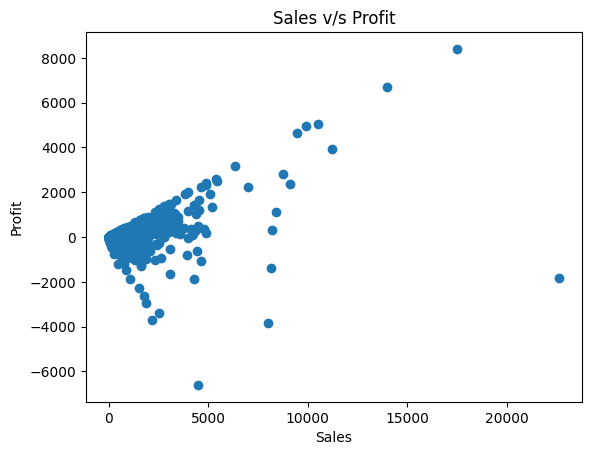

In [24]:
#scatter plot
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

At lower sales, a business either gets profit or loss. But, when the sales are high, a business mostly gets profit

In [25]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

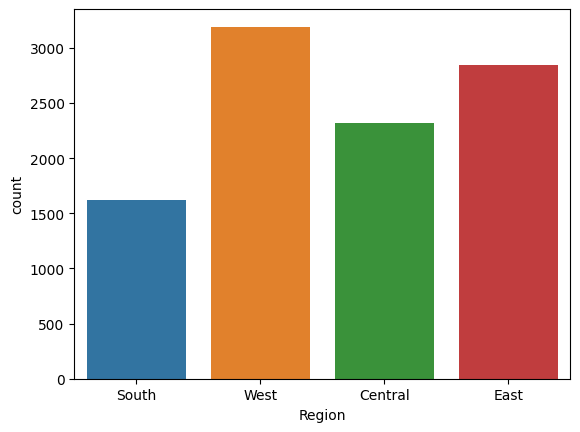

In [26]:
sns.countplot(x=df['Region'])

<ipython-input-27-46ac016d8181>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prof_S = pd.DataFrame(df.groupby('Ship Mode').sum()).sort_values('Profit')
<ipython-input-27-46ac016d8181>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prof_G = pd.DataFrame(df.groupby('Segment').sum()).sort_values('Profit')
<ipython-input-27-46ac016d8181>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prof_R = pd.DataFrame(df.groupby(

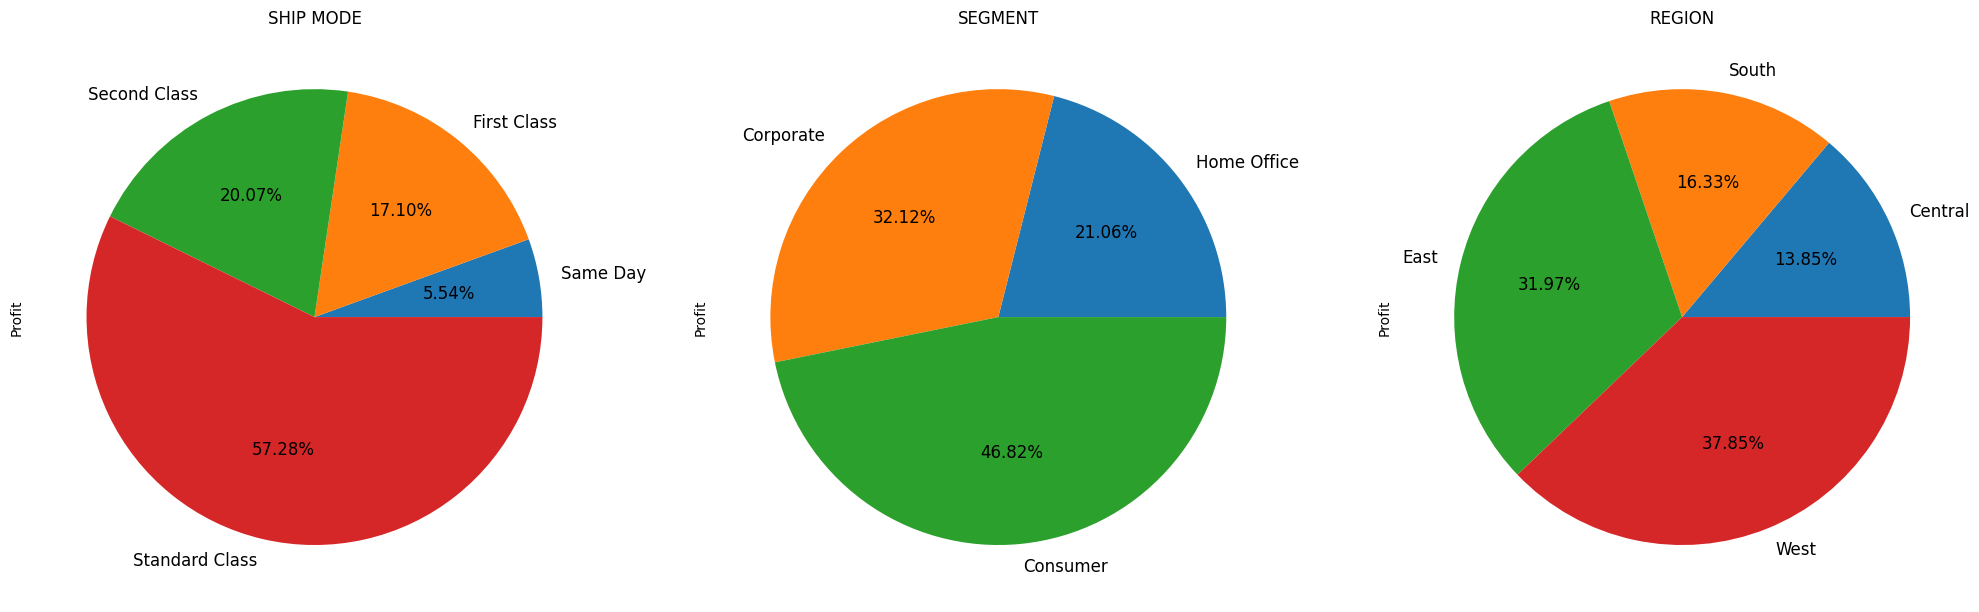

In [27]:
# Plotting Shipmode, Segment, and Region-wise profit
prof_S = pd.DataFrame(df.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(df.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(df.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(25,12))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[2])

plt.show() #displaying ShipMode, Segment and Region wise sales summary by profit.

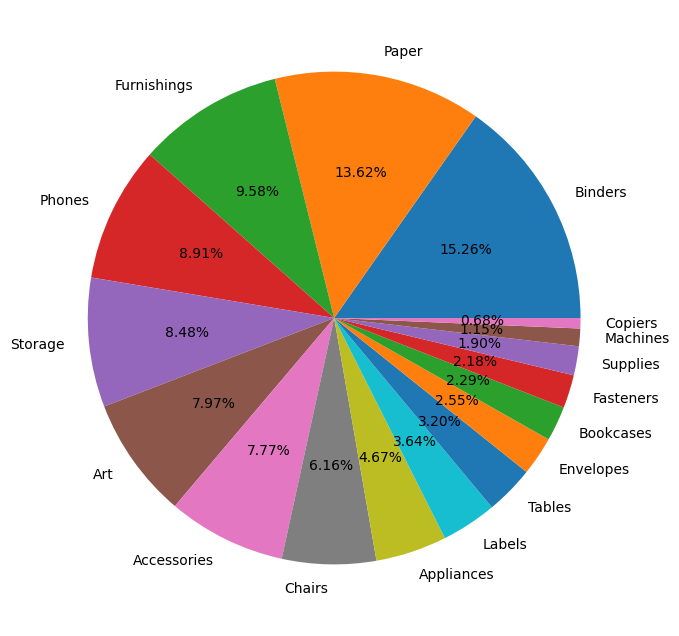

In [28]:
plt.figure(figsize=(8,8))
plt.pie(df["Sub-Category"].value_counts(), labels= df["Sub-Category"].value_counts().index, autopct ="%.2f%%")
plt.show()

In [29]:
profits=df.groupby(["State"])["Profit"].sum().nlargest(10)
profits

#top 10 states

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

<Axes: xlabel='State'>

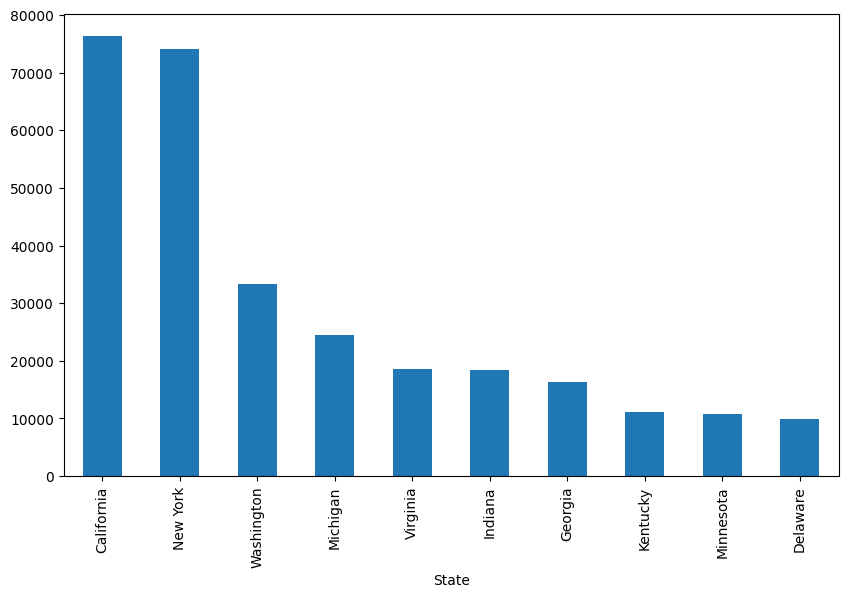

In [30]:
plt.figure(figsize=(10,6))
profits.plot.bar()

In [31]:
cities_profit = pd.DataFrame(df.groupby('City')['Profit'].sum())
cities_profit.reset_index(inplace=True)

In [32]:
cities_profit = cities_profit.sort_values( by="Profit",ascending=False)

In [33]:
# sort the 'cities_profit' DataFrame by 'Profit' column in descending order
sorted_cities_profit = cities_profit.sort_values(by='Profit', ascending=False)

# select the top 10 rows and store them in a new DataFrame
top_10_cities_profit = sorted_cities_profit.head(10)

# print the top 10 cities and their total profits
print(top_10_cities_profit)


              City      Profit
329  New York City  62013.8973
266    Los Angeles  30431.4267
452        Seattle  29121.6825
438  San Francisco  17466.1186
123        Detroit  13146.6935
233      Lafayette  10018.3876
215        Jackson   7581.6828
21         Atlanta   6993.6629
300    Minneapolis   6824.5846
437      San Diego   6377.1960


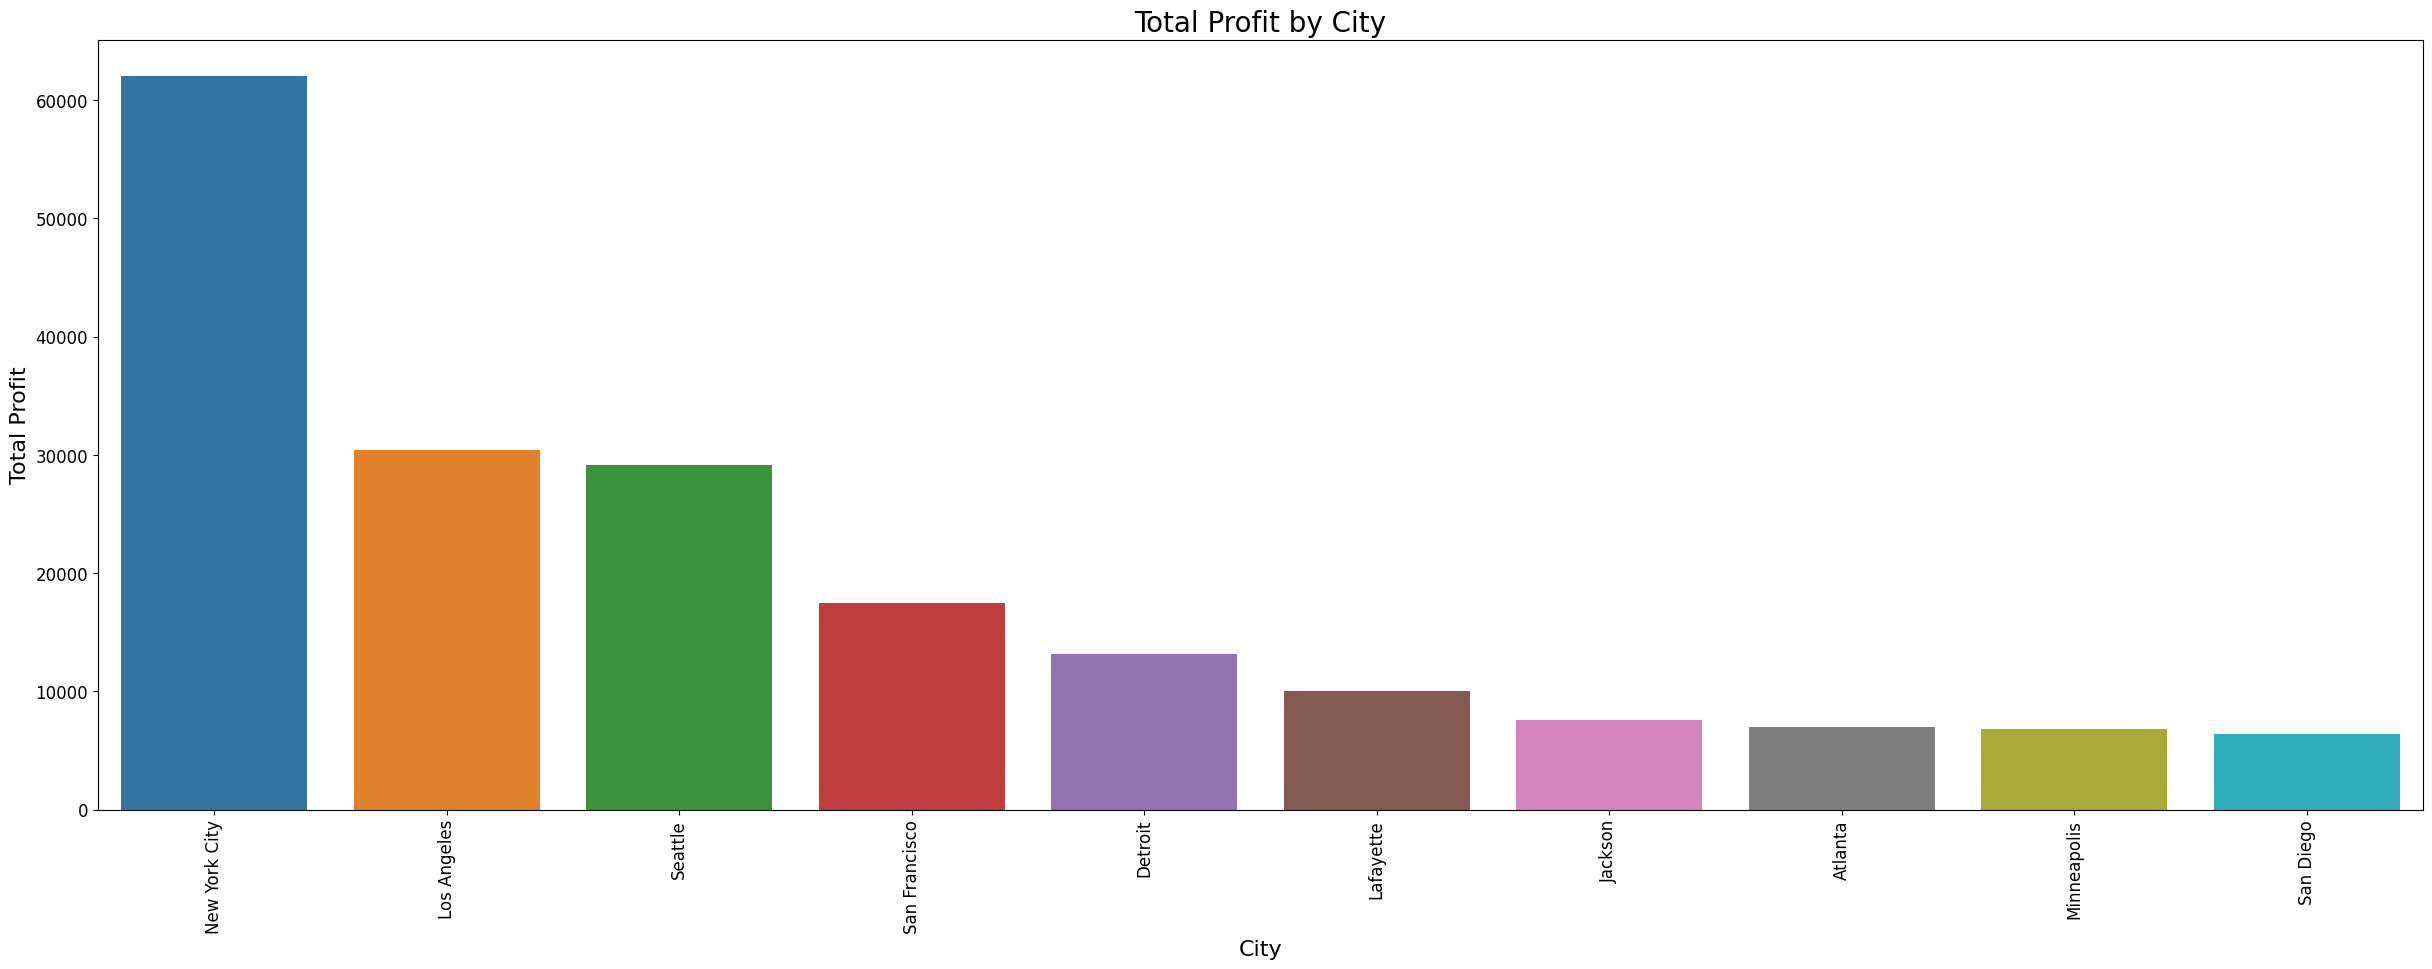

In [34]:
# create a bar chart of the cities and their total profits
plt.figure(figsize=(30,10))
sns.barplot(x='City', y='Profit', data=top_10_cities_profit)
plt.title('Total Profit by City', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Total Profit', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#top 10 cities

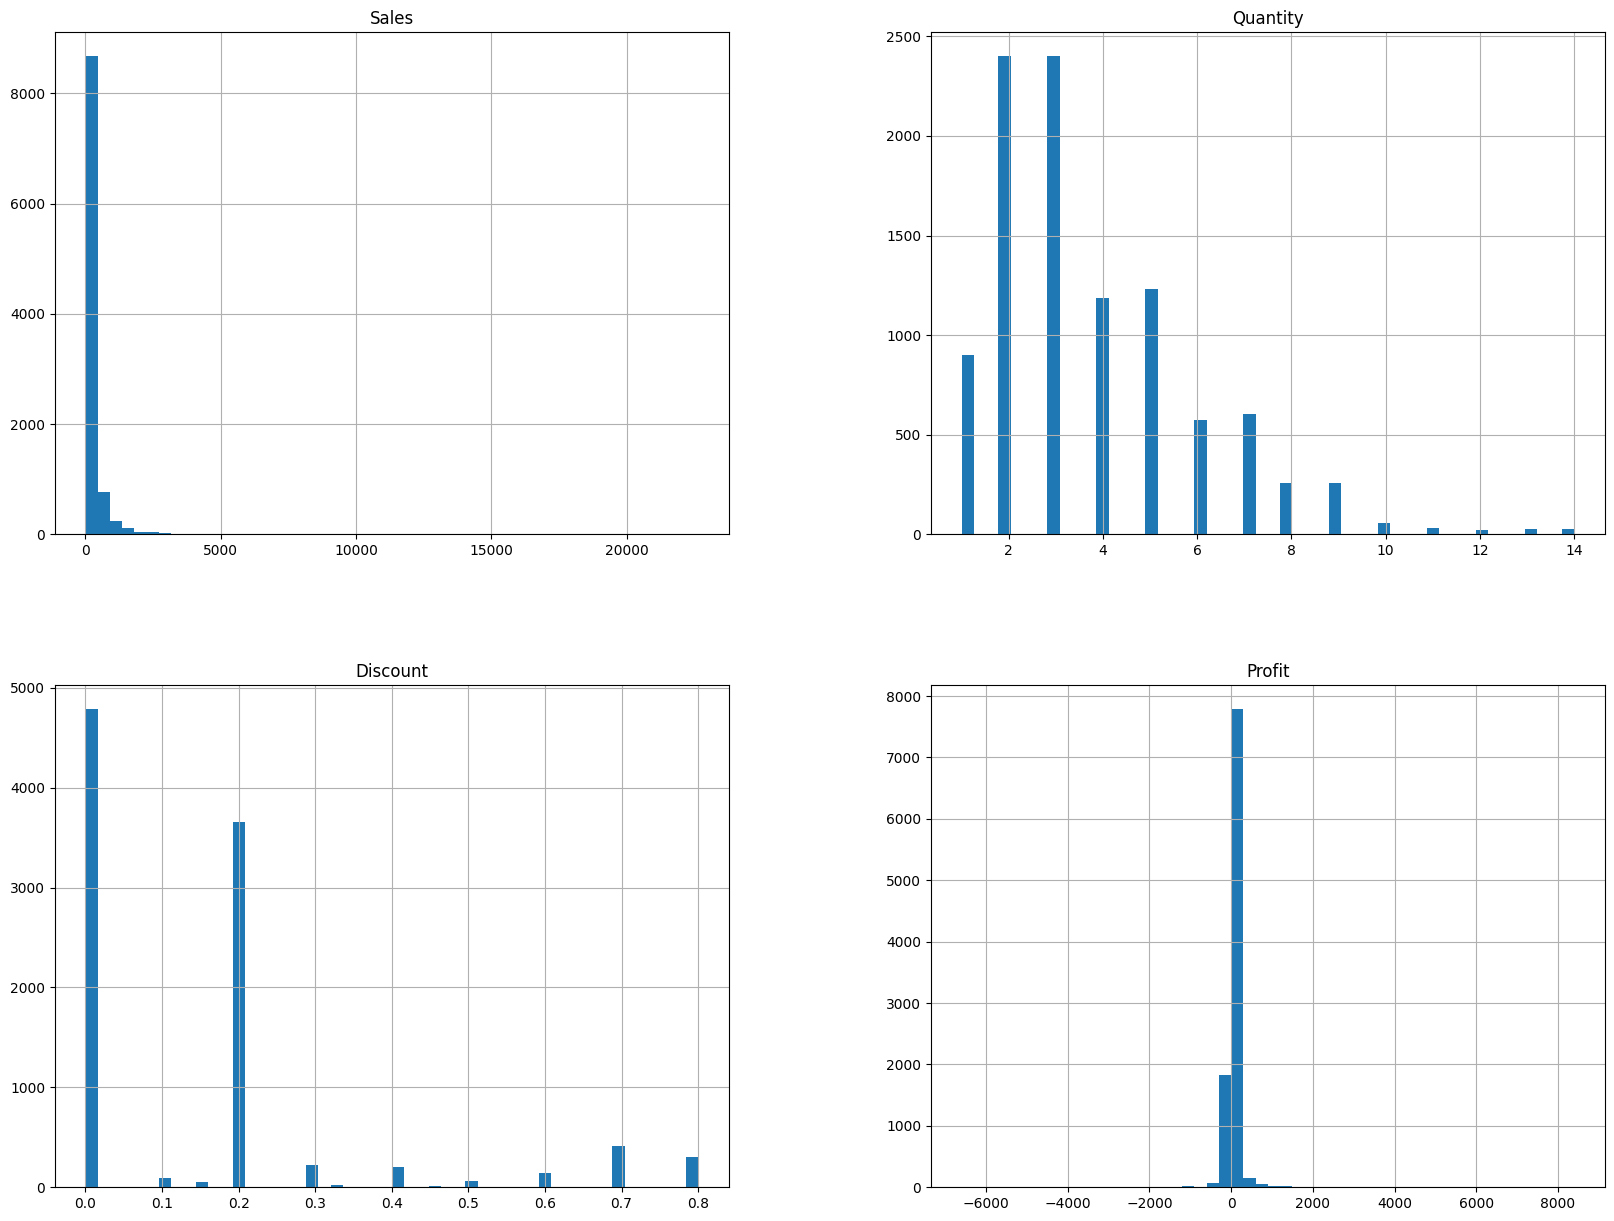

In [35]:
df.hist(bins=50,figsize=(20,15))
plt.show()

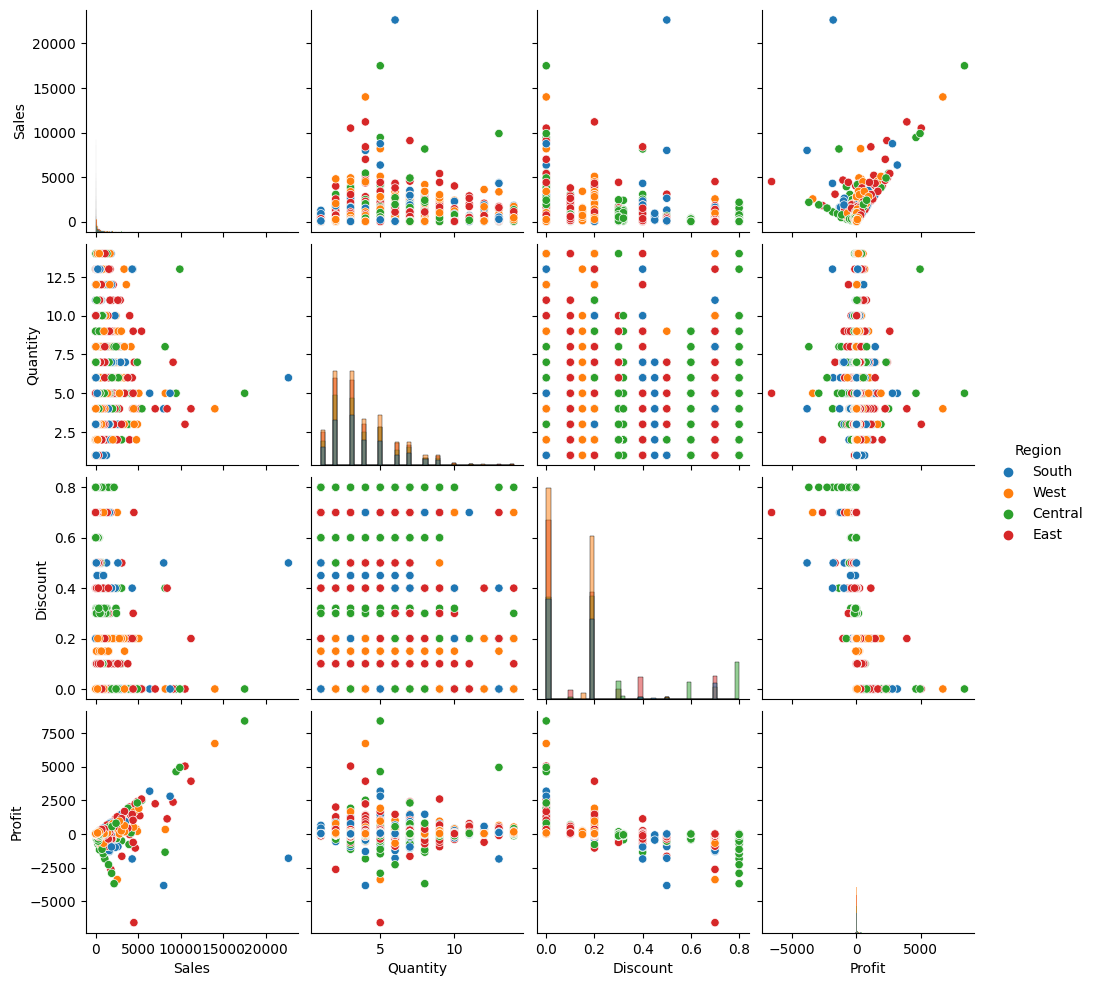

In [36]:
#plotting pair plot (Region wise)
sns.pairplot(df, hue='Region' , diag_kind="hist")

Region wise analysis

<ipython-input-37-e244474e63e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(df.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')


<Axes: xlabel='Region'>

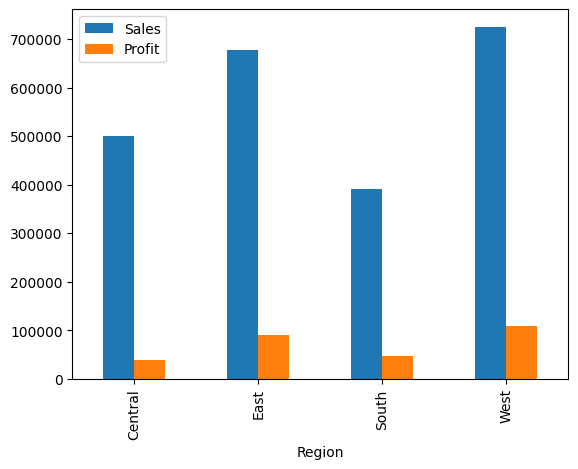

In [37]:
pd.DataFrame(df.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

Western & Eastern regions have shown higher sales and profits as compared to the Southern and central regions.
Central region has higher sales than the Southern region but it has shown lower profit gains between the two of them.

State wise analysis

In [38]:
#Top 10 states with maximum number of items sold
df.groupby('State').count()['Quantity'].sort_values(ascending= False)[:10]

State
California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: Quantity, dtype: int64

In [39]:
#total statewise sales in descending order
state_wise_sales = pd.DataFrame(df.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

<ipython-input-39-5c934b82b9c7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_wise_sales = pd.DataFrame(df.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)


,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620


In [40]:
# Top 10 states with maximum amount of sales
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# States with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
           State        Sales
0    California  457576.2715
1      New York  310827.1510
2         Texas  170124.5418
3    Washington  138560.8100
4  Pennsylvania  116496.3620
5       Florida   89473.7080
6      Illinois   80162.5370
7          Ohio   77976.7640
8      Michigan   75879.6440
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


The company needs to focus more on these 10 states that have least amount of sales.

In [41]:
# Top 10 states with maximum amount of profit
print('States with maximum amount of profit:\n',df.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

# States with minimum amount of profit
print('States with minimum amount of profit:\n',df.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64


<ipython-input-41-e80e59a1270a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print('States with maximum amount of profit:\n',df.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])
<ipython-input-41-e80e59a1270a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print('States with minimum amount of profit:\n',df.groupby('State').sum()['Profit'].sort_values()[:10])


Company must focus on cities which made loss.
They should analyse their resource usage and the categories which are being sold in those states.

In [42]:
#new dataframe having states and regions
state_region = df[['State','Region']]

#drop duplicated values
state_region = state_region.drop_duplicates()
state_region

#adding region column to state_wise_sales dataframe
state_wise_sales = pd.merge(state_wise_sales, state_region)

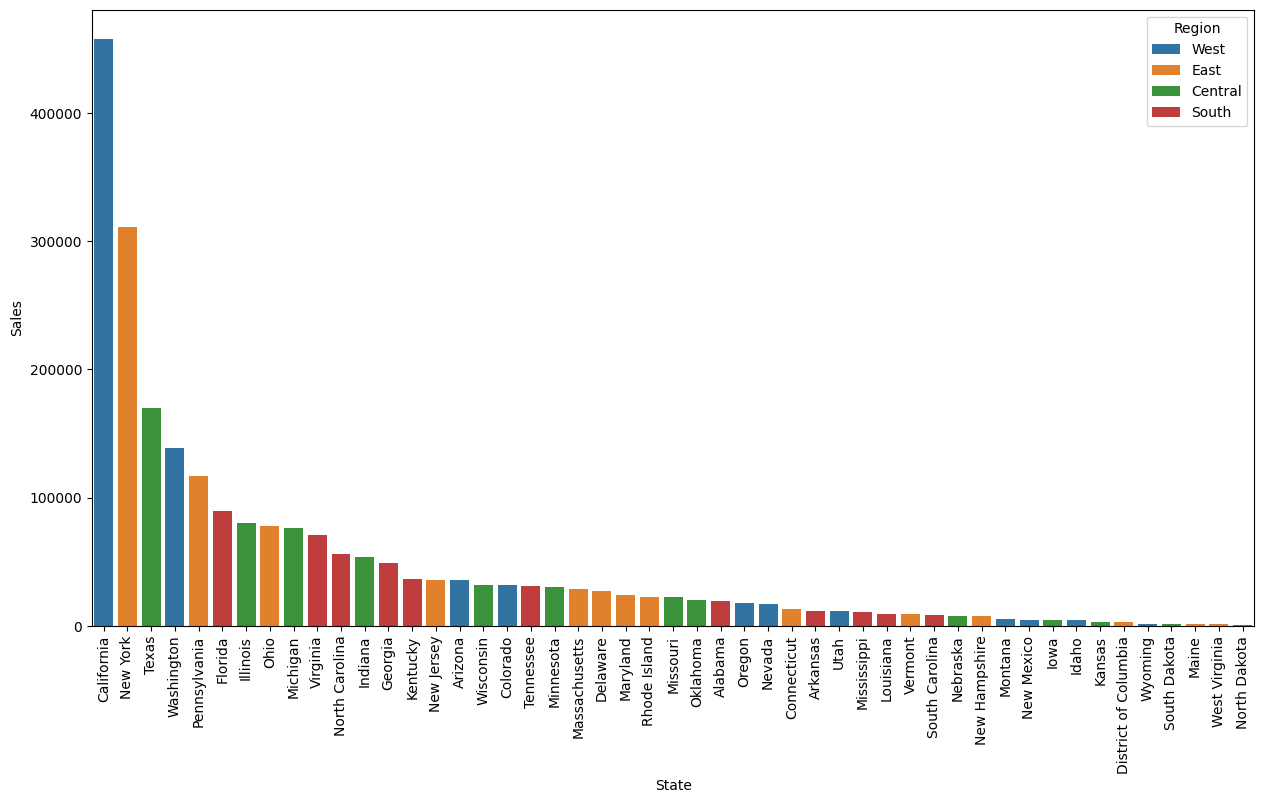

In [43]:
#plotting Sales Statewise
plt.figure(figsize=(15,8))
g= sns.barplot(x='State', y='Sales', data = state_wise_sales, hue='Region', dodge=False)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

The company has highest sales in the state of California which is around 450k.

Maximum of the sales are done in the west and the east coast regions.

BUSINESS QUESTIONS

1) Which Category is Best Selling and Most Profitable?


In [44]:
 # Group sales, profit and quantity by category

df1 = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())

df1

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


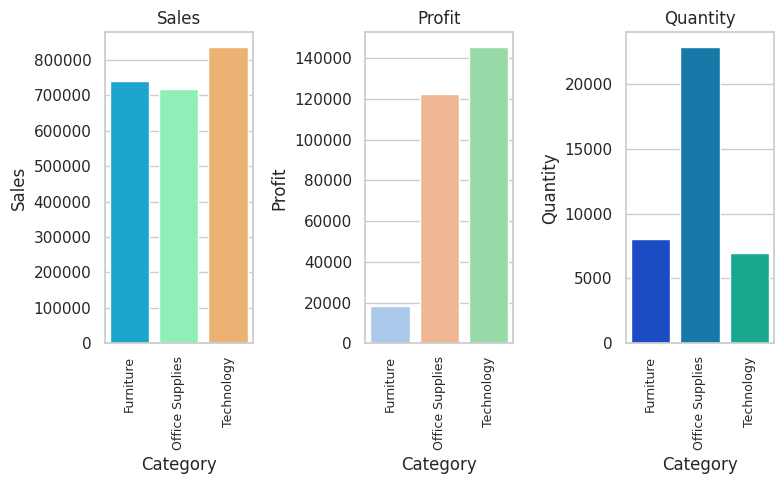

In [45]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = df1.index, y = df1.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = df1.index, y = df1.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.

Furniture is the least profitable and quantity sold are at a minimum too.

Office Supplies sells the most in terms of quantity as it is relatively cheap product.

2) What are the Best Selling and Most Profitable Sub-Category?

In [46]:
# Group by sub-category

df2 = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales

subcat_df2 = pd.DataFrame(df2.sort_values('Sales', ascending = False))

subcat_df2

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [47]:
# Sort by descending order according to profit

subcat_profit_df2 = pd.DataFrame(subcat_df2.sort_values('Profit', ascending = False))

subcat_profit_df2

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


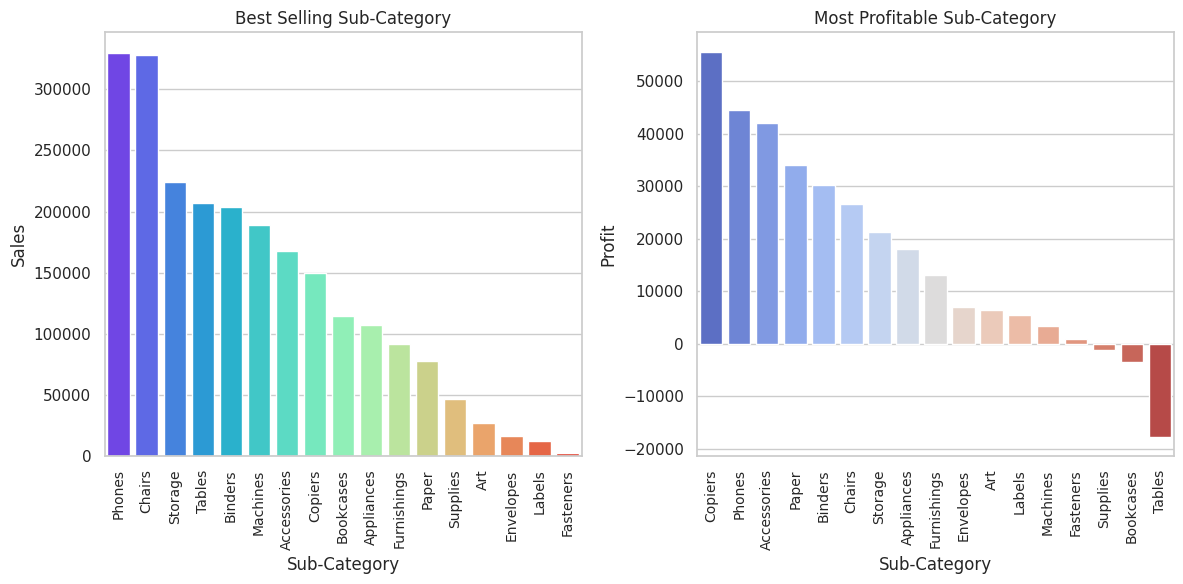

In [48]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2.index, y = subcat_profit_df2.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()


Phones and Chairs are Top 2 best selling sub-category.

Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.

Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

3) Which is the Top Selling Sub-Category?

In [49]:
df3 = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

df3

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


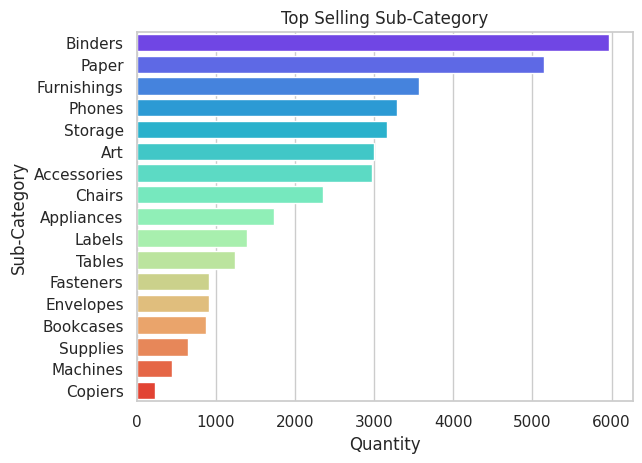

In [50]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df3, y = df3.index, x = df3.Quantity, palette = "rainbow")
plt.title("Top Selling Sub-Category")
plt.show()


Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.

Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.


4) Which Customer Segment is Most Profitable?

In [51]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())

df4  

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


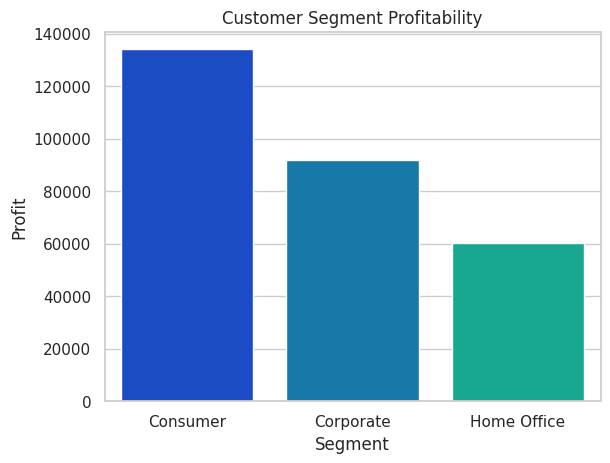

In [52]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

5) Which is the Preferred Ship Mode?

<Axes: xlabel='Ship Mode', ylabel='count'>

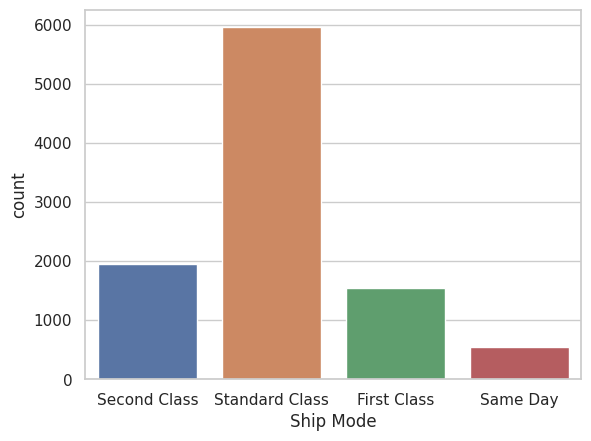

In [53]:
sns.countplot(x=df['Ship Mode'])

Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

#Recommendations : -
Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.